# OBJECTIVE
Stock prediction of the google

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import fbprophet
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-02,1446.939941,1482.949951,1446.420044,1464.699951,1464.699951,1859100
1,2020-07-06,1480.060059,1506.589966,1472.859985,1495.699951,1495.699951,1564000
2,2020-07-07,1490.000000,1516.800049,1483.550049,1485.180054,1485.180054,1458200
3,2020-07-08,1494.319946,1505.880005,1485.630005,1496.000000,1496.000000,1249700
4,2020-07-09,1506.449951,1522.719971,1488.084961,1510.989990,1510.989990,1423300


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1404700
249,2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500
250,2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300
251,2021-07-01,2496.995117,2529.250000,2496.995117,2527.370117,2527.370117,856000
252,2021-07-02,2536.790039,2576.959961,2535.379883,2572.580078,2572.580078,625480


In [10]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,1896.626302,1918.256629,1879.001890,1899.233476,1899.233476,1.581129e+06
std,346.257514,345.993308,346.744548,347.231884,347.231884,5.859913e+05
min,1411.030029,1443.708984,1406.550049,1415.209961,1415.209961,3.468000e+05
25%,1566.969971,1587.683960,1546.099976,1568.489990,1568.489990,1.220700e+06
50%,1781.000000,1799.069946,1760.520020,1781.770020,1781.770020,1.446500e+06
75%,2152.939941,2237.310059,2151.620117,2224.750000,2224.750000,1.779500e+06
max,2541.070068,2576.959961,2539.199951,2572.580078,2572.580078,4.329100e+06


In [15]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].head()

0   2020-07-02
1   2020-07-06
2   2020-07-07
3   2020-07-08
4   2020-07-09
Name: Date, dtype: datetime64[ns]

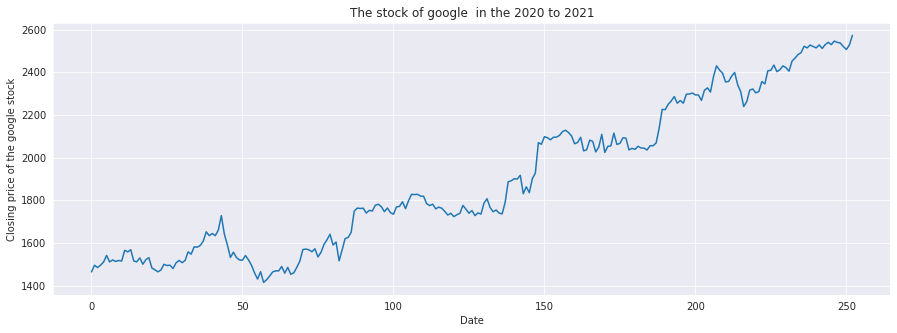

In [16]:
#visualization
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing price of the google stock')
plt.title('The stock of google  in the 2020 to 2021')
plt.show()

The stock of google income is increasing  from the year 2020  up to data

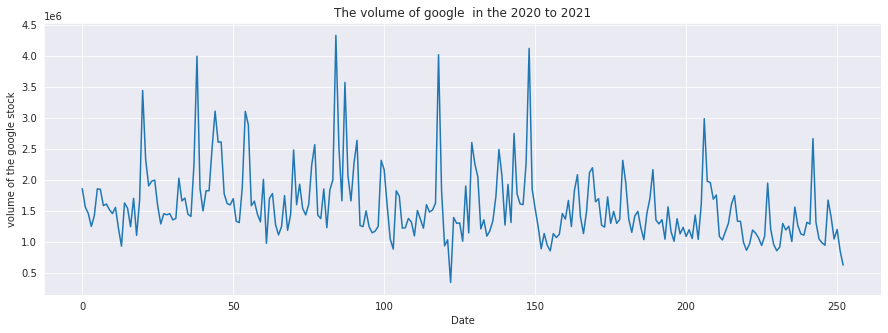

In [52]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('volume of the google stock')
plt.title('The volume of google  in the 2020 to 2021')
plt.show()

In [17]:
# IN this dataset we only need two columns  that is the date and the closing price of google
data=df[['Date','Close']]
data.head()

,Date,Close
0,2020-07-02,1464.699951
1,2020-07-06,1495.699951
2,2020-07-07,1485.180054
3,2020-07-08,1496.000000
4,2020-07-09,1510.989990


In [25]:
#naming the columns
data=data.rename(columns={'Date':'ds','Close':'y'})
data.head()

,ds,y
0,2020-07-02,1464.699951
1,2020-07-06,1495.699951
2,2020-07-07,1485.180054
3,2020-07-08,1496.000000
4,2020-07-09,1510.989990


In [35]:
#fixing the data into the prophet model for prediction

from fbprophet import Prophet
model=Prophet(daily_seasonality =True)
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


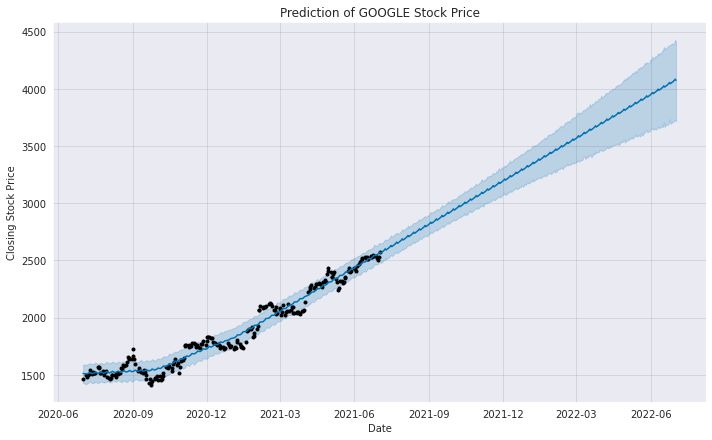

In [49]:
future=model.make_future_dataframe(periods=365)
predictions=model.predict(future)
model.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

The stock of Google has an upward trend maybe because of increased activies of online activitiy since 2020 due to

covid 19 and the  acccording the  prediction the the stock price of google will continue to increase whoever said

data is google was never wrong expecially in this digital erra

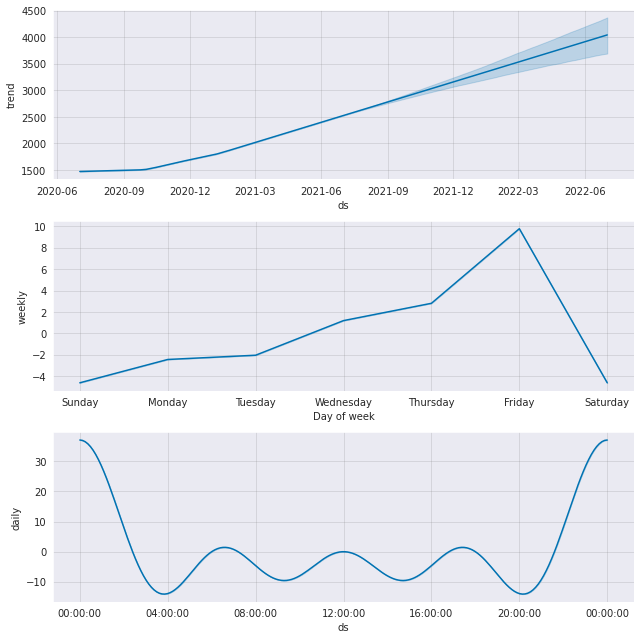

In [50]:
#checking for trends and seasonal varaiations of the data
model.plot_components(predictions)
plt.show()

The above shows the upward  increase with dates

steady increase  with days of the week and then drop sharply on friday and then increase from sunday  again steady

The trend with respect to time  from 4 to 20.00 is almost constant